# HW2
Author: Arman Hafizi

Student ID: 20954217

## Part I

In [1]:
%cd 'PartI'

/Users/ahafizi/University/2022 3-Fall/CS 885/Assignments/HW2/PartI


In [4]:
from RL2 import *
from TestBandit import mdp, banditProblem

In [7]:
def plots(x, y, label, xlabel, ylabel, title):
    import matplotlib.pyplot as plt
    fig = plt.figure(figsize=(8, 3), dpi=320)
    for i in range(len(y)):
        plt.plot(x, y[i], label=label[i])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.show()

- Graph [3 points]: Test your code for UCB, epsilon-greedy bandit and Thompson sampling with the simple multi-armed bandit problem described in TestBandit.py. Produce a graph where the x-axis indicates the iteration # (from 0 to 200) and the y-axis indicates the average (based on 1000 trials) of the rewards earned at each iteration. The graph should contain 3 curves corresponding to:
    - UCB
    - Epsilon-greedy bandit (epsilon = 1 / # iterations)
    - Thompson sampling (k=1 and prior consists of Beta distributions with all hyper parameters set to 1)

In [13]:
nTrials, nIterations = 1000, 200

In [24]:
# UCB
acc_rewards = np.zeros(nIterations)
for trial in range(nTrials):
    [empiricalMeans, rewards] = banditProblem.UCBbandit(nIterations)
    acc_rewards += rewards
acc_rewards /= nTrials
ucb = acc_rewards.copy()

In [14]:
# epsilon greedy
acc_rewards = np.zeros(nIterations)
for trial in range(nTrials):
    [empiricalMeans, rewards] = banditProblem.epsilonGreedyBandit(nIterations)
    acc_rewards += rewards
acc_rewards /= nTrials
eps = acc_rewards.copy()

In [16]:
# thompson sampling
acc_rewards = np.zeros(nIterations)
for trial in range(nTrials):
    [empiricalMeans, rewards] = banditProblem.thompsonSamplingBandit(prior=np.ones([mdp.nActions,2]),nIterations=nIterations)
    acc_rewards += rewards
acc_rewards /= nTrials
thm = acc_rewards.copy()

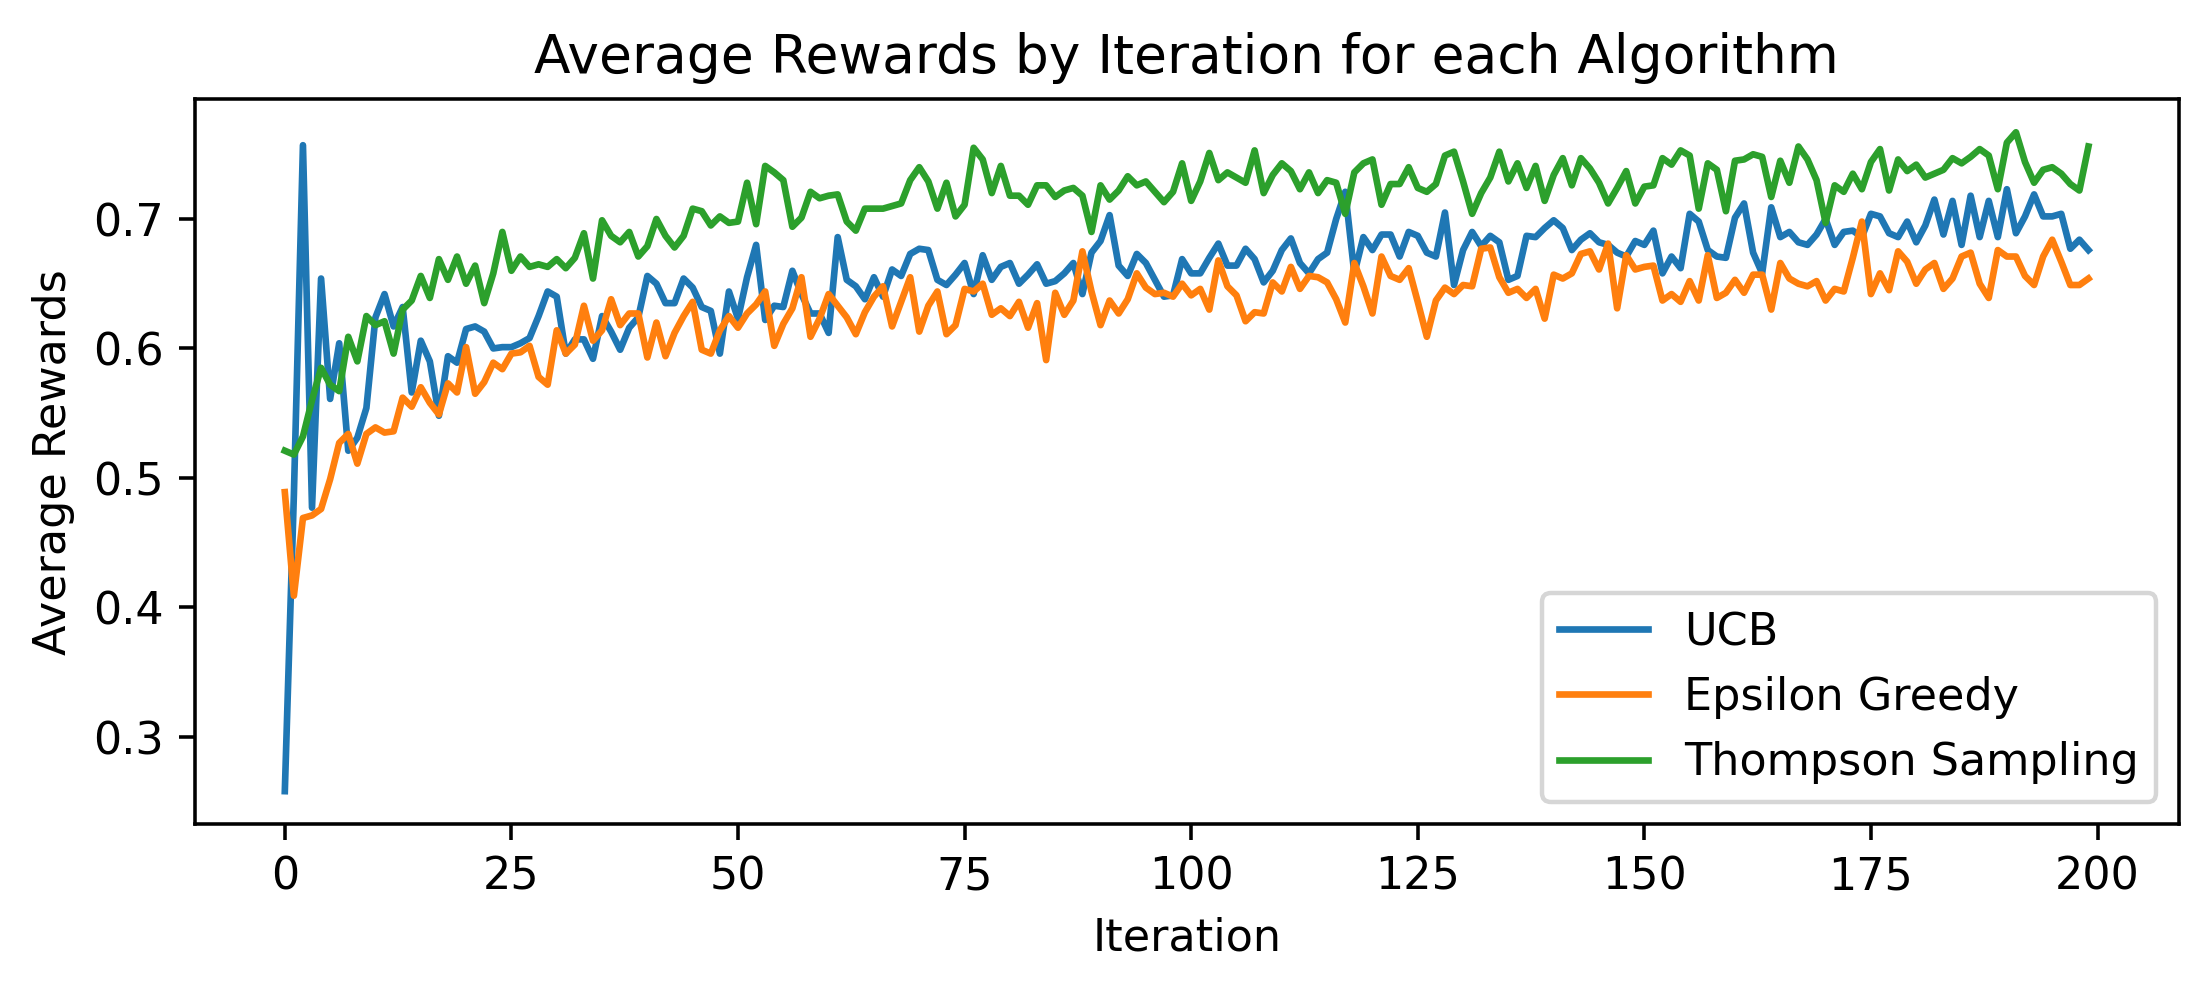

In [25]:
plots(list(range(nIterations)), [ucb, eps, thm], ['UCB', 'Epsilon Greedy', 'Thompson Sampling'], 'Iteration', 'Average Rewards', 'Average Rewards by Iteration for each Algorithm')

- Explain the results [1 point]: Are the results surprising? Do they match what is expected based on the theory?

Answer: *Thompson sampling has a higher average rewards than UCB and epsilon greedy algorithm since it obtains many more samples from the environment than the two latter algorithms. On the other side, epsilon greedy has the lowest average rewards among the three methods because the epsilon decreases as the iteration increases meaning that it is less likely to choose a random action and keeps on going with the previous base knowledge. UCB acquires a better average rewards than epsilon greedy by lowering the selection chance of an action that had previosuly been selected multiple times.*

## Part II

In [2]:
%cd '../PartII'

/Users/ahafizi/University/2022 3-Fall/CS 885/Assignments/HW2/PartII


- Graphs [2 points]: Produce 3 graphs that show the performance of REINFORCE, REINFORCE with baseline and PPO on the cartpole problem. Running "python REINFORCE.py --mode=cartpole" produces the graph for REINFORCE which is saved in the "images" directory. For each graph, the y axis corresponds to the cumulative rewards (averaged over the last 25 episodes) and the x axis is the number of episodes (up to 800 for REINFORCE and REINFORCE with baseline, and up to 150 for PPO).

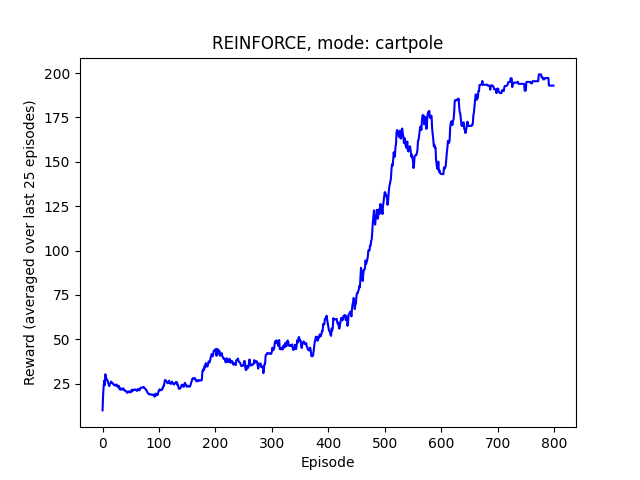

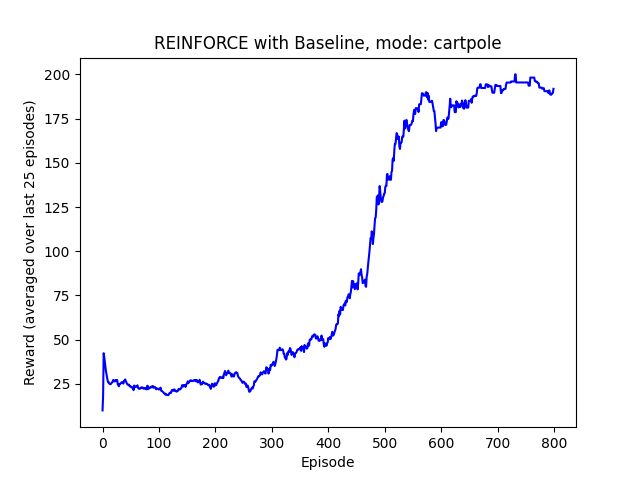

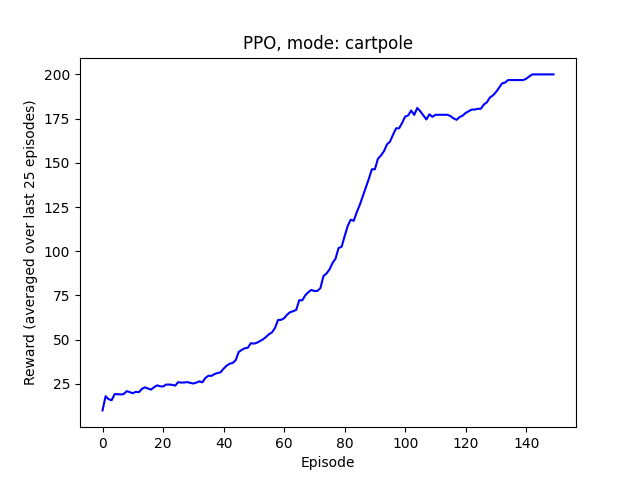

In [3]:
from IPython.display import Image, display
relative_path = 'cs885a2p2_starter_code/images/'
for mode in ['reinforce', 'reinforce_baseline', 'ppo']:
    display(Image(filename = relative_path + mode + '-cartpole.png'))

- Explanation [1 point]: Explain the results based on the properties of each algorithm.

Answer: *Adding the baseline to the reinforce method has led to a less variant curve and a bit faster convergence because delta imroves based on the value function. That is in reinforce with baseline, the probability of selecting an action increases w.r.t its advantage. On the other side, PPO has a smoother curve with a faster convergence (almost always increasing) because of the clipping function which basically takes larger and safer steps towards the optimum parameters.*

## Part III

In [4]:
%cd '../PartIII'

/Users/ahafizi/University/2022 3-Fall/CS 885/Assignments/HW2/PartIII


- Graph [2 points]: Produce a graph that shows the performance of offline DQN and CQL with the offline data for cartpole. The y-axis corresponds to the cumulative rewards (averaged over the last 10 episodes) and the x axis is the number of episodes (up to 200). Feel free to take the average of more than one seed to reduce the noise in your graph.

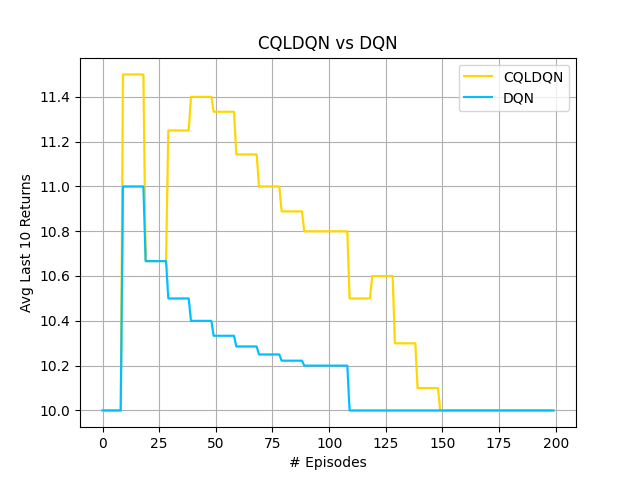

In [6]:
relative_path = 'cs885a2p3_starter_code/'
display(Image(filename = relative_path + 'results.png'))

- Explanation [1 point]: Explain the results based on the properties of each algorithm.

Answer: *CQLDQN has a higher performance than DQN that is averaging higher rewards in the middle episodes. This is because in CQLDQN, the weights are updated considering the penalty that leads to a more precise lower bound for the expected Q values preventing underestimation.*